In [1]:
# Pythonもモジュールを読み込み
import numpy as np # 数値計算ライブラリ
from scipy.integrate import odeint # 常微分方程式を解くライブラリ
import matplotlib.pyplot as plt # 描画ライブラリ

In [2]:
# N体問題の運動方程式
def func_nbody(x, t):
    # 条件設定
    GM = 1.327e11 # 万有引力定数×太陽の質量, km^3/s^(-2)
    GM1 = 3.986e5 # 万有引力定数×地球の質量, km^3/s^(-2)
    theta1 = 44*(np.pi/180) # テキトーに44degと設定, deg -> rad
    period1 = 365*24*60*60 # 地球の軌道周期, sec
    a1 = 149597870.7 # 地球の軌道長半径, km
    
    # 地球の位置
    r1 = np.array([ a1*np.cos(2*np.pi*t/period1 + theta1), 
                                    a1*np.sin(2*np.pi*t/period1 + theta1) ])
    
    # 運動方程式の計算
    d1 = x[0:2] - r1
    r_norm = np.sqrt(x[0]**2 + x[1]**2)	
    d1_norm = np.sqrt(d1[0]**2 + d1[1]**2)

    if d1_norm < 6371: #　地球距離が地球半径以下になると衝突してしまうため、エラーを返す
        print("ERROR: 地球スイングバイ時の高度がマイナスです！")

    dxdt = [x[2], 
            x[3], 
            -GM*x[0]/(r_norm**3) - GM1*d1[0]/(d1_norm**3),
            -GM*x[1]/(r_norm**3) - GM1*d1[1]/(d1_norm**3)]
    
    return dxdt

In [3]:
# 条件の設定
x0 = np.array([1.05782e8, 1.05782e8,-21.06, 21.06]) # 位置, 速度, km, km/s
t_span = np.linspace(0,365*24*60*60,100) # 1年分を100ステップで刻む

In [4]:
# 微分方程式の数値計算
sol = odeint(func_nbody, x0, t_span)

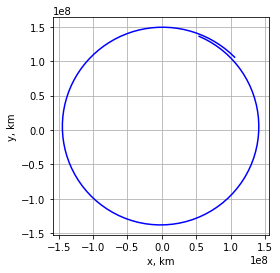

In [5]:
# 描画
plt.plot(sol[:, 0],sol[:, 1], 'b')
plt.grid() # 格子をつける
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()